# Image Analysis Task

In this programming task, we'll get to work with some sample medical imaging data in the DICOM format and we'll learn how to visualise it and how to do some basic medical image analysis tasks, such as smoothing and segmentation. 

<div class="alert alert-block alert-info">
**Important Note**: The code for this task is quite complex.  You are not expected to fully understand the code below, but just to try your hand at it, so that you get an idea of what it is like to handle medical imaging data.  You are welcome to simply run the code without spending time figuring out what it does. Explanations are provided for the curious ones!
</div>

## Part 1: Importing packages needed

*Pydicom* is a Python package for working with DICOM files.  It allows us to read and easily manipulate DICOM files with the use of Python.

ITK (Insight Segmentation and Registration Toolkit) is a library that enables image processing, and it is widely used for the development of image segmentation and image registration programs. Here, we'll use *SimpleITK*, as it is a simplified interface to ITK.

The *OS* module in Python provides a way of using operating system dependent functionality, for instance for working with files and folders.  

As already discussed in Week 1, *NumPy* is a widely used Python package for working with large, multi-dimensional data (note that here we'll be using it to manipulate pixel data), while *Matplotlib* is a Python library for plotting data. 

Now, lets import the packages. 

In [1]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install SimpleITK

In [3]:
import pydicom
import SimpleITK
import os
import numpy
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<br>
## Part 2: Loading the data

In this programming task we're going to be working with a dataset from an MR examination of a patient's head. The images are captured as DICOM files and they are stored in a folder called 'MyHead'.  

Run the code in the following cell to create a list called 'lstFilesDCM', which contains all DICOM files within 'MyHead'. <br>

Remember that you are not expected to understand all the code in this programming task. (If, however, you are really curious, this is what this code does: It first creates a list called 'lstFilesDCM' that is initially empty. It then uses the *os.walk()* function from the OS module to traverse the MyHead folder. For each file found in this folder, we check whether it is a DICOM file, and if it is, we add its extended name (i.e. the folder and file name) to the lstFilesDCM list.)

In [27]:
PathDicom = "D:\MyLib.Doc\data-science-in-healthcare-and-precision-medicine\MyHead"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file is DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

In [28]:
PathDicom

'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead'

Run the code in the following cell to get the first five elements of the 'lstFilesDCM' list, i.e. the extended names of the first five DICOM files.

In [29]:
lstFilesDCM[:5]

['D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000000.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000001.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000002.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000003.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000004.dcm']

### Reading a DICOM file

Run the code in the following cell to use Pydicom's *read_file()* function to read the first DICOM file within lstFilesDCM (identified as 'lstFilesDCM[0]'). The resulting object is called 'HeadDs'. Note that we could have called it anything we wanted.

In [31]:
HeadDs = pydicom.read_file(lstFilesDCM[0])

### Getting metadata

We can now get metadata of interest for this image with the use of appropriate Pydicom functions (e.g. *PatientPosition* or *Modality*).

Run the code in the following cell to get the position of the patient relative to the imaging equipment space.

In [33]:
HeadDs.PatientPosition

'HFS'

*HFS* stands for Head First-Supine. This means that the patient’s head was positioned toward the front of the imaging equipment and it was in an upward direction. 

Run the code in the following cell to get the date the study started. Note that the date format is YYYYMMDD.

In [34]:
HeadDs.StudyDate

'20111110'

Run the code in the following cell to get the image modality. Note that 'MR' stands for Magnetic Resonance, 'CT' stands for Computed Tomography and 'PT' stands for Positron Emission Tomography (PET).

In [35]:
HeadDs.Modality

'MR'

In [36]:
HeadDs.is_little_endian

True

In [39]:

HeadDs.timestamp

1648815448.0

<br>
## Part 3: Visualisation

Now that we've got an idea of the imaging data that we're going to be working with, we'll visualise the data by creating a two-dimensional plot. But first we'll need to extract some additional information needed for plotting.

**Important note**: Remember that you don't need to fully understand the code in this programming task. In fact, you could simply reuse the code in Part 3 for a new collection of MR images, given that you've called the list of your DICOM files 'lstFilesDCM' and the first image 'HeadDs'.

### Preparing for visualisation

In order to plot the data with Matplotlib, we first need to i) combine the pixel data from all DICOM files (i.e. from all slices) into a 3D dataset, and ii) specify appropriate coordinate axes.

We'll start by calculating the total dimensions of the combined 3D dataset. These should be: (Number of pixel rows in a slice) x (Number of pixel columns in a slice) x (Number of slices) along the x, y, and z cartesian axes. We'll call the calculated dimensions 'CalcPixelDims'.

In [40]:
HeadDs.Rows

256

In [41]:
HeadDs.Columns

256

In [42]:
lstFilesDCM

['D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000000.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000001.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000002.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000003.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000004.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000005.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000006.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000007.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000008.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000009.dcm',
 'D:\\MyLib.Doc\\data-science-in-healthcare-and-precision-medicine\\MyHead\\MR000010.dcm',

In [45]:
len(lstFilesDCM)

176

In [43]:
CalcPixelDims = (int(HeadDs.Rows), int(HeadDs.Columns), len(lstFilesDCM))

Run the code in the following cell to get CalcPixelDims.

In [44]:
CalcPixelDims

(256, 256, 176)

Now that we've calculated the dimensions, we can create a 3D NumPy array to address the first point discussed above. Note that a NumPy array is understood as a grid of values, all of the same type. 

The following code creates a NumPy array called 'HeadImgArray' that has the same size as CalcPixelDims, and which contains the pixel data from all DICOM files in lstFilesDCM. 

In [46]:
HeadDs.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 3, 0, ..., 0, 2, 5],
       [0, 9, 3, ..., 1, 4, 4],
       [0, 2, 0, ..., 0, 7, 1]], dtype=uint16)

In [47]:
HeadDs.pixel_array.dtype

dtype('uint16')

In [49]:
HeadImgArray = numpy.zeros(CalcPixelDims, dtype=HeadDs.pixel_array.dtype)

for filenameDCM in lstFilesDCM:
    ds = pydicom.read_file(filenameDCM)
    HeadImgArray[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

Now that we've addressed the first point, we move on to specify appropriate coordinate axes.

We use Pydicom's *PixelSpacing* and *SliceThickness* functions to calculate the spacing between pixels in the three axes. We call the resulting object 'CalcPixelSpacing'.

In [50]:
CalcPixelSpacing = (float(HeadDs.PixelSpacing[0]), float(HeadDs.PixelSpacing[1]), float(HeadDs.SliceThickness))

In [51]:
CalcPixelSpacing

(0.9765625, 0.9765625, 1.0)

In [56]:
print(HeadDs.PixelBandwidth)
print(HeadDs.PixelSpacing)
print(HeadDs.SliceThickness)
print(HeadDs.SliceLocation)

592
[0.9765625, 0.9765625]
1
-87.5


Then, we use CalcPixelDims and CalcPixelSpacing to calculate coordinate axes. You don't need to understand what this code does. Just run it to compute x, y and z.

In [57]:
x = numpy.arange(0.0, (CalcPixelDims[0]+1)*CalcPixelSpacing[0], CalcPixelSpacing[0])
y = numpy.arange(0.0, (CalcPixelDims[1]+1)*CalcPixelSpacing[1], CalcPixelSpacing[1])
z = numpy.arange(0.0, (CalcPixelDims[2]+1)*CalcPixelSpacing[2], CalcPixelSpacing[2])

In [64]:
(CalcPixelDims[0]+1)*CalcPixelSpacing[0]

250.9765625

In [58]:
print(x)

[  0.          0.9765625   1.953125    2.9296875   3.90625     4.8828125
   5.859375    6.8359375   7.8125      8.7890625   9.765625   10.7421875
  11.71875    12.6953125  13.671875   14.6484375  15.625      16.6015625
  17.578125   18.5546875  19.53125    20.5078125  21.484375   22.4609375
  23.4375     24.4140625  25.390625   26.3671875  27.34375    28.3203125
  29.296875   30.2734375  31.25       32.2265625  33.203125   34.1796875
  35.15625    36.1328125  37.109375   38.0859375  39.0625     40.0390625
  41.015625   41.9921875  42.96875    43.9453125  44.921875   45.8984375
  46.875      47.8515625  48.828125   49.8046875  50.78125    51.7578125
  52.734375   53.7109375  54.6875     55.6640625  56.640625   57.6171875
  58.59375    59.5703125  60.546875   61.5234375  62.5        63.4765625
  64.453125   65.4296875  66.40625    67.3828125  68.359375   69.3359375
  70.3125     71.2890625  72.265625   73.2421875  74.21875    75.1953125
  76.171875   77.1484375  78.125      79.1015625  8

### Visualising

We can now plot the data with the use of the pyplot module in matplotlib.

Again, you don't need to understand in detail what this code does. You can simply run it to get a plot of the head MR image. Note that you can modify the number in the last line of the code to get a different slice of the head.

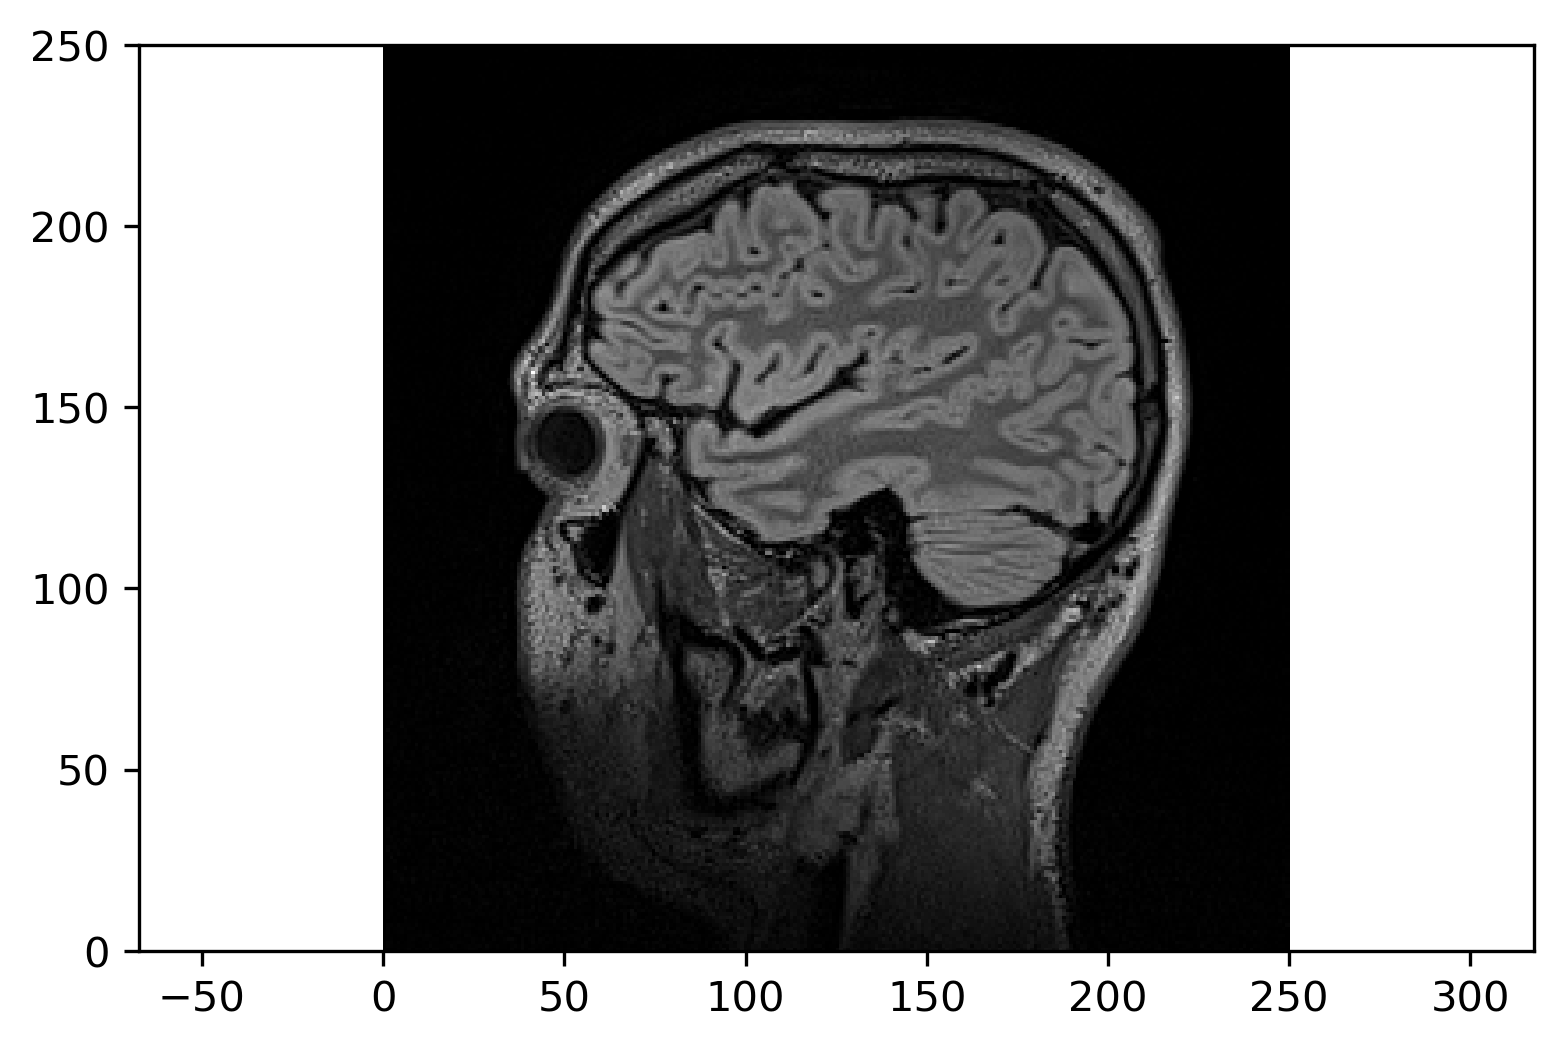

In [66]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, numpy.flipud(HeadImgArray[:, :, 125]))

<br>
## Part 4: Segmentation

In this part of the notebook we'll use SimpleITK to segment the white and grey matter in the MR images.

### Specifying a helper function

We'll be visualising quite a few 2D SimpleITK images in this part, so here we'll define a function that quickly plots a 2D SimpleITK image with a greyscale colourmap and accompanying axes.  

There's no need to understand what this code does - you can simply run it so that you can use the *sitk_show* function later on.

In [67]:
def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

### Loading the data in SimpleITK

We now need to tell SimpleITK to read the DICOM files within the 'MyHead' folder. Run the code in the following cell to extract the contents of the MRI dataset and create the corresponding 3D image called 'img3DOriginal'. 

Note that you don't need to understand what this code does. You can simply run it, so as to use img3DOriginal later on.  You can also reuse this code for a new collection of MR images, given that you've called the location of your DICOM files 'PathDicom'.

In [68]:
reader = SimpleITK.ImageSeriesReader()
filenamesDICOM = reader.GetGDCMSeriesFileNames(PathDicom)
reader.SetFileNames(filenamesDICOM)
img3DOriginal = reader.Execute()

In order to keep things simple, we'll segment a 2D slice of the 3D image (rather than the entire 3D image). Run the code below to specify that we want Z-slice 50 of the 3D image. We'll call this slice 'imgOriginal'.

Note that you could ask for a different Z-slice, if you want.

In [69]:
imgOriginal = img3DOriginal[:,:,50]

### Visualising the original data

We'll now call our *sitk_show* function to visualise the original data. 

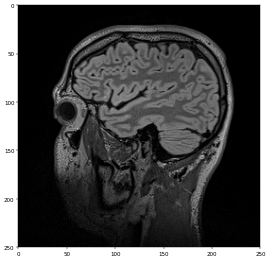

In [70]:
sitk_show(imgOriginal)

### Smoothing

Smoothing is the process of reducing noise within an image or producing a less pixelated image.  The result is an image with sharp edges or boundaries preserved and smoothing occurring only within a region.

In our case, we can see that the original image data exhibits quite a bit of noise, which is rather typical of MRI datasets. We will reduce the noise, so as to ease the process of segmentation later on.

Run the code in the following cell to apply a Curvature Flow Image Filter to smoothen *imgOriginal*. We'll call the resulting image 'imgSmooth'.

In [71]:
imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                    timeStep=0.125,
                                    numberOfIterations=5)

Now, lets see the results of the smoothened image.

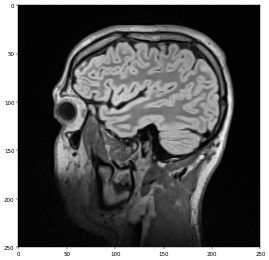

In [72]:
sitk_show(imgSmooth)

### Segmentation with the ConnectedThreshold filter

We will now apply region growing techniques to segment the white and grey matter of the smoothened image.

#### Initial segmentation of the white matter

Run the code in the following cell to apply SimpleITK's *ConnectedThreshold* filter function to imgSmooth. The image of the resulting segmented white matter is called 'imgWhiteMatter'.

As with other parts of this programming task, you don't need to fully understand what this code does. You can simply run it to get the initial segmentation of the white matter. 

If, however, you're really curious, here's a brief explanation: This filter starts from a seed point in the image that we know is white matter, and looks at all connected pixels. If their values lie within a range of interest, then they are labelled as white matter. In our case, we've set the seed to be point (150, 75), as by inspecting the previous image, it looked like that point was indeed white matter. We've also set the range of values to be between 130 and 190, as these were roughly the values that the white matter pixels exhibited (this was inspected with the use of a separate DICOM viewing software).

In [73]:
lstSeeds = [(150,75)]

imgWhiteMatter = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                              seedList=lstSeeds, 
                                              lower=130, 
                                              upper=190,
                                              replaceValue=1)

Next, we want to view the result of the segmentation. If we tried to visualise imgWhiteMatter, then all we would see would be a white-colour label in a black backdrop, which doesn’t give us much insight.  However, if we use a label overlay, then we can see the result of the segmentation of white matter in a basic RGB (red, green, blue) colour. In our case, it will show as green. 

Note that before overlaying imgSmooth and imgWhiteMatter, we first need to manipulate imgSmooth so we can successfully mix the two images. This is what the following code does. The resulting image is called 'imgSmoothInt'.

In [74]:
imgSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgSmooth), imgWhiteMatter.GetPixelID())

Now let's use SimpleITK's *LabelOverlay* function to overlay 'imgSmoothInt' and 'imgWhiteMatter', and let's visualise the result.

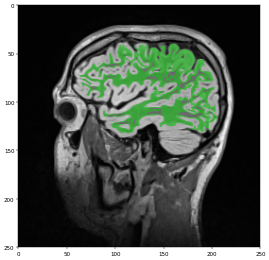

In [77]:
sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgWhiteMatter))

#### Hole-filling of the segmented white matter

As you can see in the figure above, there are several holes in the segmented white matter. We'll rectify this by applying hole-filling.  

Run the code in the following cell to use SimpleITK's *VotingBinaryHoleFilling* filter to fill in holes in *imgWhiteMatter*.  The resulting image is called 'imgWhiteMatterNoHoles'.

In [78]:
imgWhiteMatterNoHoles = SimpleITK.VotingBinaryHoleFilling(image1=imgWhiteMatter,
                                                          radius=[2]*3,
                                                          majorityThreshold=1,
                                                          backgroundValue=0,
                                                          foregroundValue=1)

Now let's use SimpleITK's *LabelOverlay* function to overlay 'imgSmoothInt' and the newly obtained 'imgWhiteMatterNoHoles', and let's visualise the result.

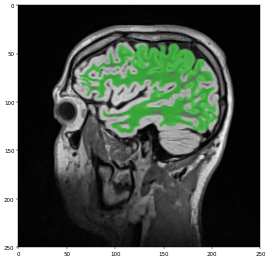

In [79]:
sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgWhiteMatterNoHoles))

#### Segmentation and hole-filling of grey matter

We'll now repeat the process for grey matter. In other words, we'll do some preliminary segmentation and then we'll perform hole-filling of the segmented grey matter. We'll then overlay the 'imgSmoothInt' and the 'imgGreyMatterNoHoles' images and we'll visualise the result.

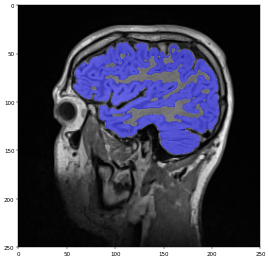

In [80]:
lstSeeds = [(119, 83), (198, 80), (185, 102), (164, 43)]

imgGreyMatter = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                             seedList=lstSeeds, 
                                             lower=150, 
                                             upper=270,
                                             replaceValue=2)

imgGreyMatterNoHoles = SimpleITK.VotingBinaryHoleFilling(image1=imgGreyMatter,
                                                         radius=[2]*3,
                                                         majorityThreshold=1,
                                                         backgroundValue=0,
                                                         foregroundValue=2) # labelGrayMatter

sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgGreyMatterNoHoles))

#### Combining the white and grey matter

Lastly, we want to combine the two label-fields, in other words, the white and grey matter.  We do this by running the code below, with the results being stored under 'imgLabels'.   

In [81]:
imgLabels = imgWhiteMatterNoHoles | imgGreyMatterNoHoles

Now let's use SimpleITK's *LabelOverlay* function to overlay 'imgSmoothInt' and the newly obtained 'imgLabels', and let's visualise the result.

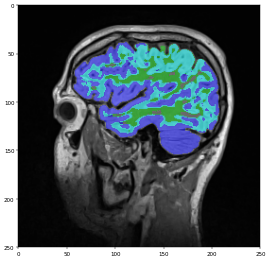

In [82]:
sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgLabels))

Note that the cyan-coloured label are regions where both the white matter and grey matter overlap from the initial segmentation process above.  

The majority of those regions should actually be part of the grey matter. Run the code in the following cell to fix this, with the results being stored under 'imgLabels2'. Note that you don't need to understand in detail what the code does. All you need to know is that it assigns any overlapping regions to the grey matter.

In [84]:
imgMask = (imgWhiteMatterNoHoles/1) * (imgGreyMatterNoHoles/2)
imgMask2 = SimpleITK.Cast(imgMask, imgWhiteMatterNoHoles.GetPixelIDValue())
imgWhiteMatterNoHoles = imgWhiteMatterNoHoles - (imgMask2*1)
imgLabels2 = imgWhiteMatterNoHoles + imgGreyMatterNoHoles

Now let's use SimpleITK's *LabelOverlay* function to overlay 'imgSmoothInt' and the newly obtained 'imgLabels2', and let's visualise the result.

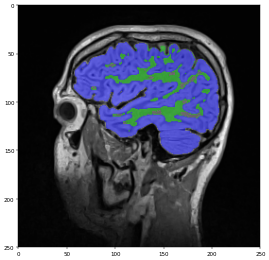

In [85]:
sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgLabels2))

And that's it! You've now had a taste of medical image processing!

You're welcome to play around with this code. If you have any questions or comments, please post them in the forums.